Importing libraries
numpy - arrays
pandas - dataframe as data is in csv so to analyse pandas
matplotlib , seaborn -graphs, plots
train_test_split - split original data into training and testing data
RandomForestRegressor - train the model
metrics - evaluate our model find error score and accuracy score

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
# load csv to pandas dataframe
gold_data=pd.read_csv("C:/Users/sriro/Downloads/new project/gld_price_data.csv")

In [3]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


gld- gold price
uso - united states oil price
slv- silver price
eur/usd - currency pair eur to usd

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# no. of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting basic info like datatypes
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking no. of missing values so handle using imputation
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


imputation--- finding correlation between data
1.positive correlation - one variable increases other increases - directly proportional
2.negative correlation - one variable increase other decreases - inversely proportional

In [9]:
correlation=gold_data.corr()

C:\Users\sriro\AppData\Local\Temp\ipykernel_13544\361041759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<AxesSubplot: >

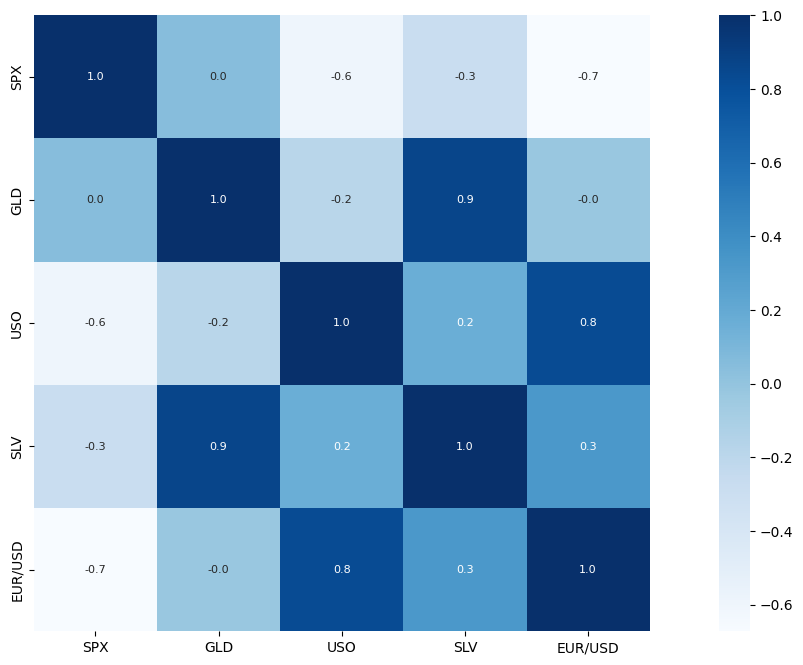

In [15]:
# constructing heatmap to understand correlation
plt.figure(figsize=(18,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

fmt=.1f means no. of decimal values
annot True means value given in each box their correlation value
Result is SLV correlated to GLD

In [18]:
# correlation values of GLD
print(correlation)
print('Correlation of Gold')
print(correlation['GLD'])

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000
Correlation of Gold
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sriro\AppData\Local\Temp\ipykernel_13544\1821043576.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

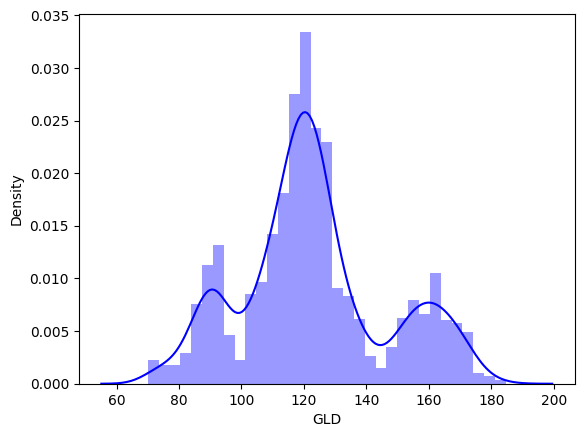

In [20]:
# checking distribution of gold price to understand range of gold values
sns.distplot(gold_data['GLD'],color='blue')

Splitting the features and the target
Features -SPX, USO,EUR/USD
TARGET - GLD

In [21]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into  training data and testing data
put 80% data into train and 20% into test
so we put test_size=0.2 which is 20%
put the same random state for both as it is used for splitting in selected option way

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:
Random Forest Regressor - ensemble model of decision tree 
Random Forest has multiple decision trees- diff. values from diff. decision trees - find the value using the voting method like by taking mean of all values or median

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# training the model using fit function
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation - evaluate using test data

In [27]:
# prediction on Test Data
test_data_prediction=regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.55509951  81.99809978 116.29570054 127.68390098 120.81160143
 154.78139768 150.10819786 125.95550039 117.47549886 126.07460049
 116.60970093 172.03210141 141.64969858 168.07719933 115.20050014
 117.74300028 139.12350298 170.15000073 159.87400207 156.75819949
 155.04890068 125.0161     175.80579978 157.30170319 125.23450033
  93.79789984  77.33170031 120.61220001 119.06939945 167.50329893
  88.27390034 125.36550032  91.08420098 117.72660009 121.0136993
 135.74060083 115.57270113 115.54620072 147.76050009 106.9708009
 104.64410251  87.22759767 126.48310068 117.88320013 153.30439912
 119.78639979 108.35639998 107.90369795  93.14660034 127.16559763
  75.20770024 113.72479909 121.29800001 111.14579947 118.98399926
 120.50849966 160.18530022 168.36170103 146.99679732  85.99429851
  94.49640038  86.8534986   90.65280001 118.91400073 126.40150052
 127.6484002  169.89989998 122.2165996  117.18939912  98.79090048
 168.87200166 142.77409888 132.3597027  121.20410204 121.48749919
 119.8089007

In [29]:
# compare predicted values with actual values using metrics(imported)
# Real value is Y_test and predicted values in test_data_prediction
# R squared error - check the efficiency of the model
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888566955492112


R squared error value is less so good efficiency how means our values are in the range of 100s so 0.98 is minor error if range of values are 1s around then 0.98 is a big error

In [ ]:
# plot actual value and predicted value in graphs so as to compare


Compare the Actual values and Predicted Values in a Plot

In [30]:
# Convert Y_test into a list so not to give an error
Y_test=list(Y_test)

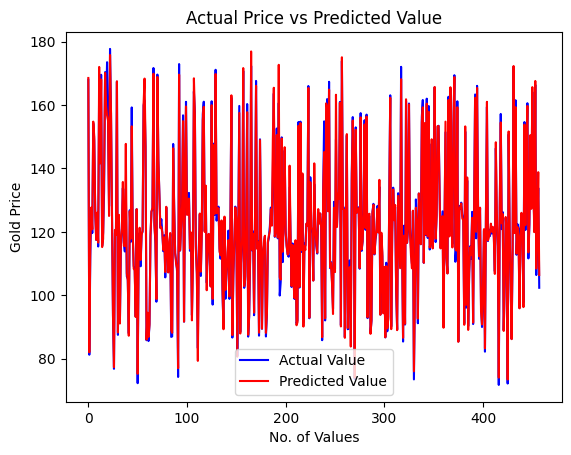

In [31]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color = 'red', label='Predicted Value')
plt.title('Actual Price vs Predicted Value')
plt.xlabel('No. of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()